<a href="https://colab.research.google.com/github/NaveenGumaste/Python-ML/blob/main/Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 [==============================] - 13s 7ms/step - loss: 0.2087 - val_loss: 0.1470
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1346 - val_loss: 0.1242
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1208 - val_loss: 0.1159
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1146 - val_loss: 0.1107
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1103 - val_loss: 0.1068
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1065 - val_loss: 0.1034
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1034 - val_loss: 0.1008
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1008 - val_loss: 0.0982
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0984 - val_loss: 0.0963
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0964 - val_loss: 0.094

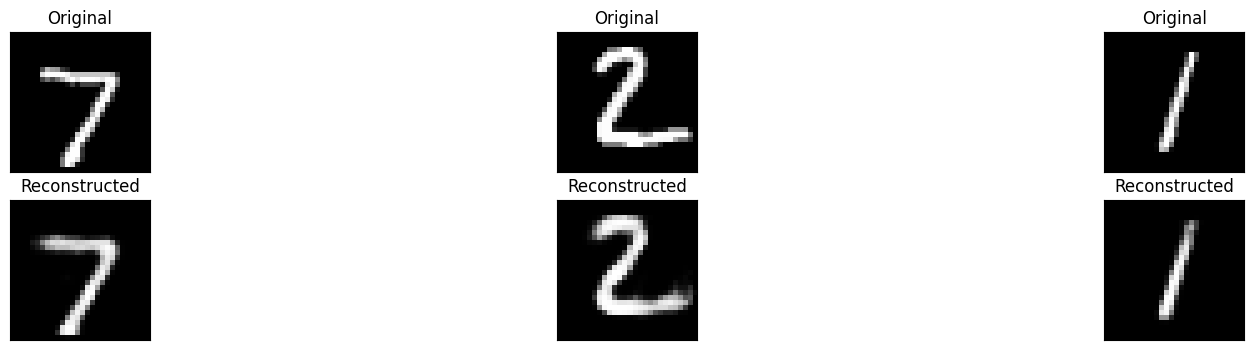

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate example data
# In practice, you would load your own data.
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the autoencoder model
input_shape = (28, 28, 1)

# Encoder
encoder = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
])

# Decoder
decoder = keras.Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid'),
    layers.Reshape((28, 28, 1)),
])

# Combine the encoder and decoder
autoencoder = keras.Sequential([encoder, decoder])

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some data
encoded_images = encoder(x_test)
decoded_images = decoder(encoded_images)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 3  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].numpy().reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()